Predicted Class: Red


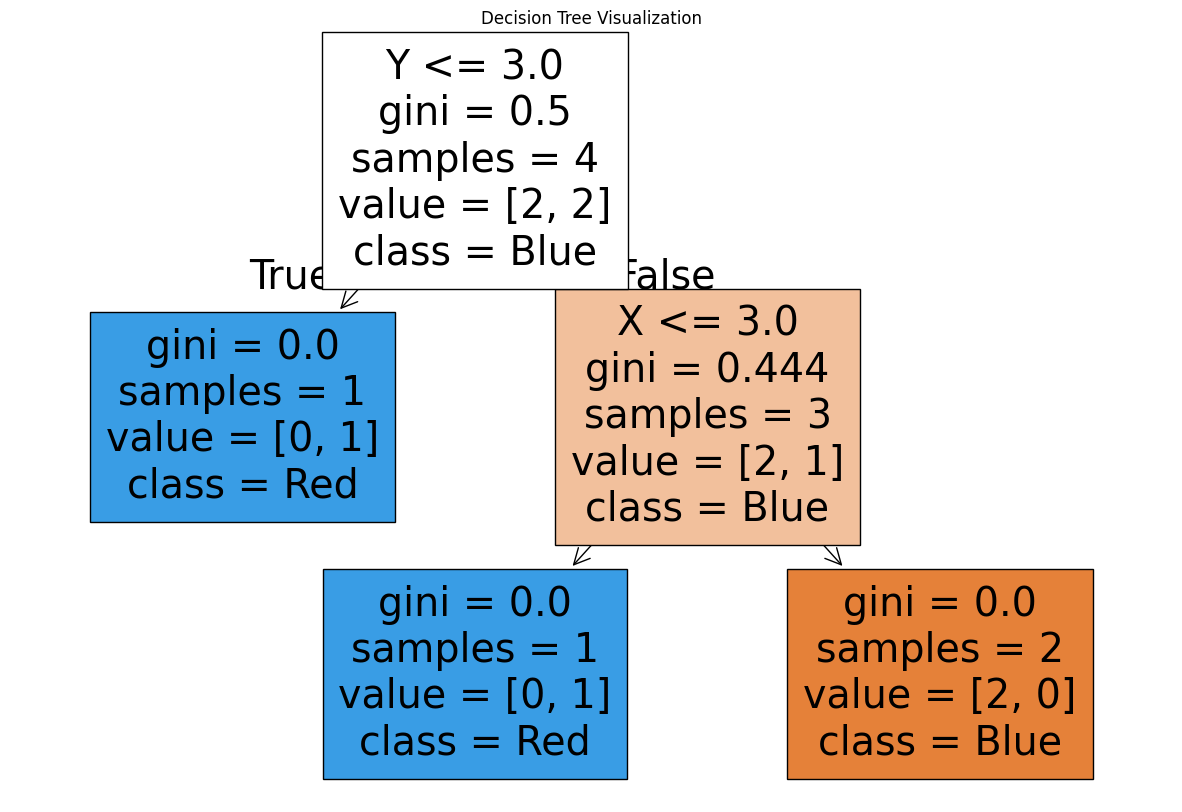

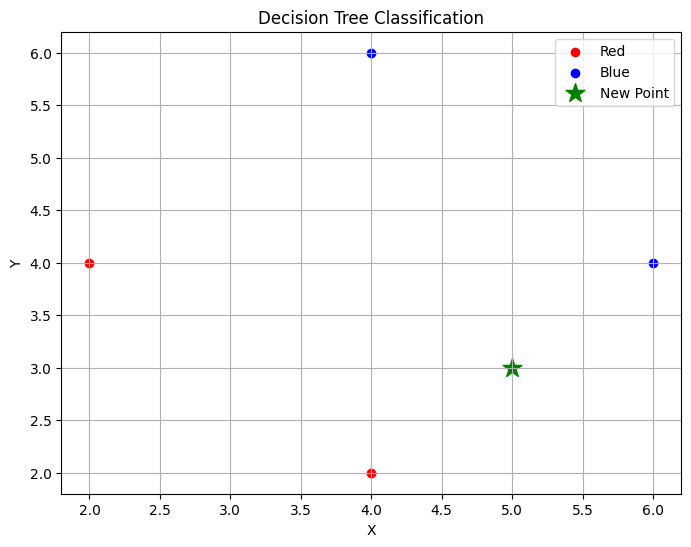

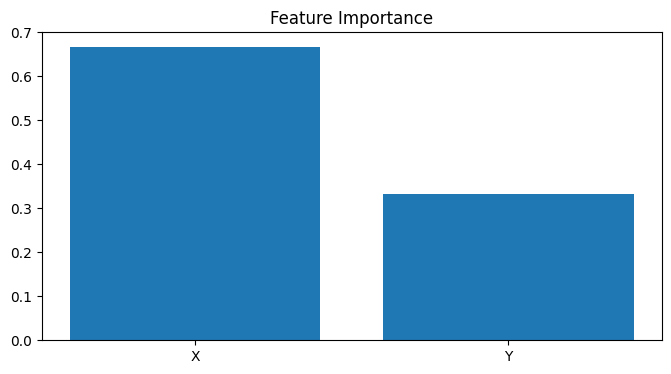

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Example 1: Decision Tree Classification (Classifying a New Point)
X_class = np.array([[2, 4], [4, 2], [4, 6], [6, 4]])  # Feature points
y_class = np.array(["Red", "Red", "Blue", "Blue"])   # Classes
new_point = np.array([[5, 3]])

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

clf = DecisionTreeClassifier()
clf.fit(X_class, y_encoded)
prediction_class = clf.predict(new_point)
print("Predicted Class:", le.inverse_transform(prediction_class)[0])

# Visualize decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=['X', 'Y'], class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Plot data points
plt.figure(figsize=(8,6))
plt.scatter(X_class[y_class == "Red"][:,0], X_class[y_class == "Red"][:,1], color='red', label='Red')
plt.scatter(X_class[y_class == "Blue"][:,0], X_class[y_class == "Blue"][:,1], color='blue', label='Blue')
plt.scatter(new_point[:,0], new_point[:,1], color='green', marker='*', s=200, label='New Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Tree Classification')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance
importances = clf.feature_importances_
plt.figure(figsize=(8,4))
plt.bar(['X', 'Y'], importances)
plt.title('Feature Importance')
plt.show()


Predicted House Price ($1000s): 180.0


C:\Users\DHUSNIC INFANT DM\AppData\Local\Temp\ipykernel_19828\985068608.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_test = np.arange(min(X_reg), max(X_reg), 10).reshape(-1, 1)


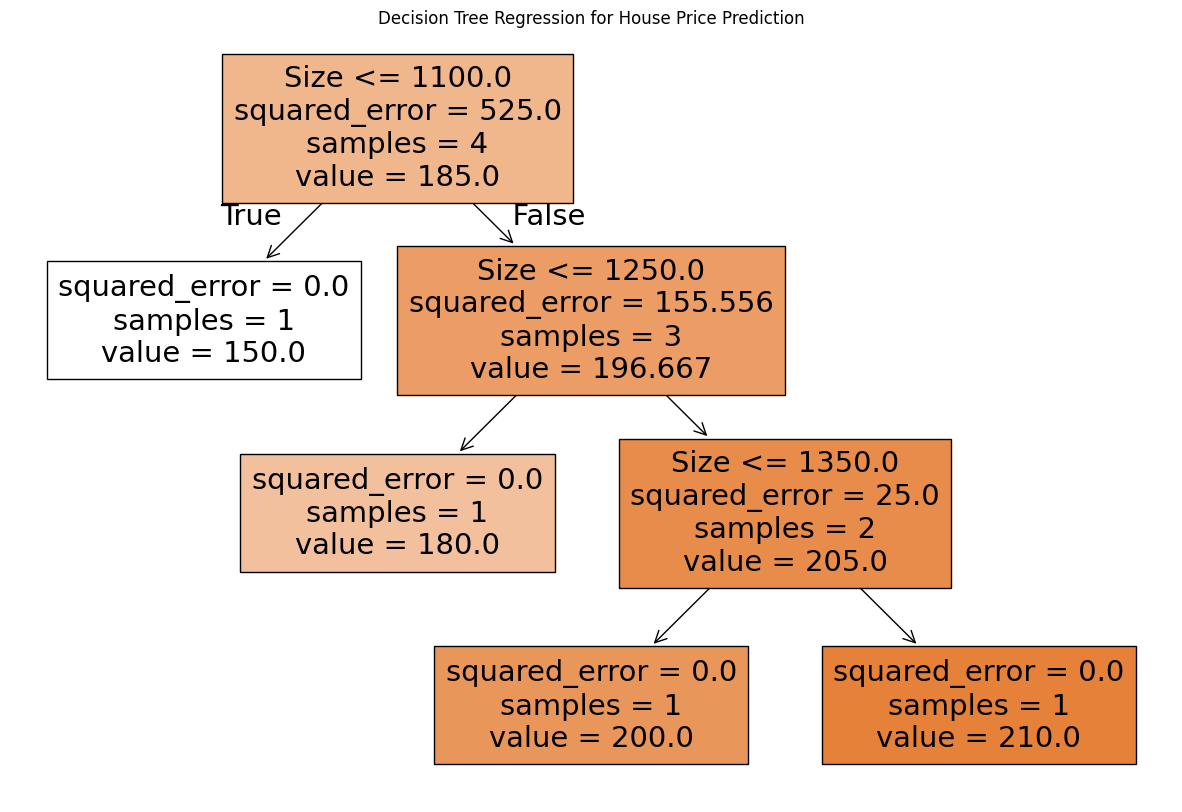

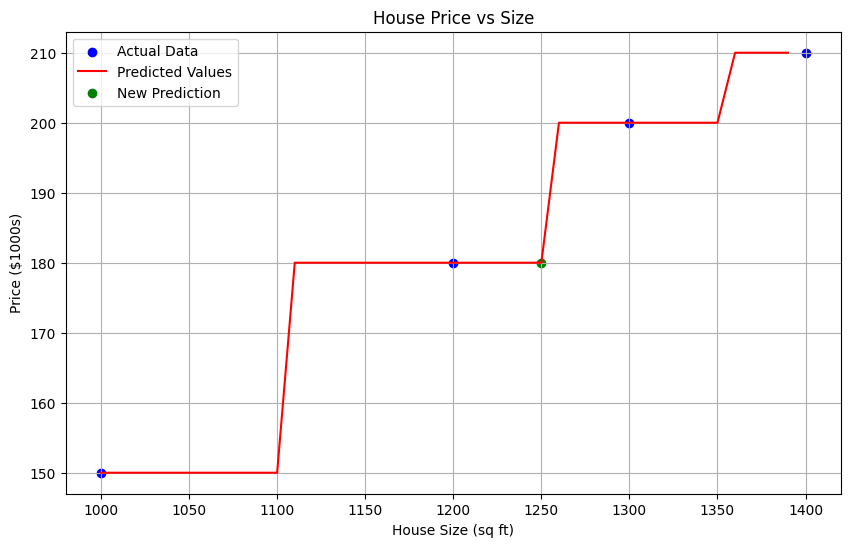

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Example 2: Decision Tree Regression (Predicting House Price)
X_reg = np.array([[1000], [1200], [1300], [1400]])  # House sizes
y_reg = np.array([150, 180, 200, 210])             # House prices
new_house = np.array([[1250]])

regressor = DecisionTreeRegressor()
regressor.fit(X_reg, y_reg)
predicted_price = regressor.predict(new_house)
print("Predicted House Price ($1000s):", predicted_price[0])

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(regressor, feature_names=['Size'], class_names=None, filled=True)
plt.title('Decision Tree Regression for House Price Prediction')

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(X_reg, y_reg, color='blue', label='Actual Data')
X_test = np.arange(min(X_reg), max(X_reg), 10).reshape(-1, 1)
y_pred = regressor.predict(X_test)
plt.plot(X_test, y_pred, color='red', label='Predicted Values')
plt.scatter(new_house, predicted_price, color='green', label='New Prediction')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('House Price vs Size')
plt.legend()
plt.grid(True)
plt.show()

Predicted Class: Not Buy


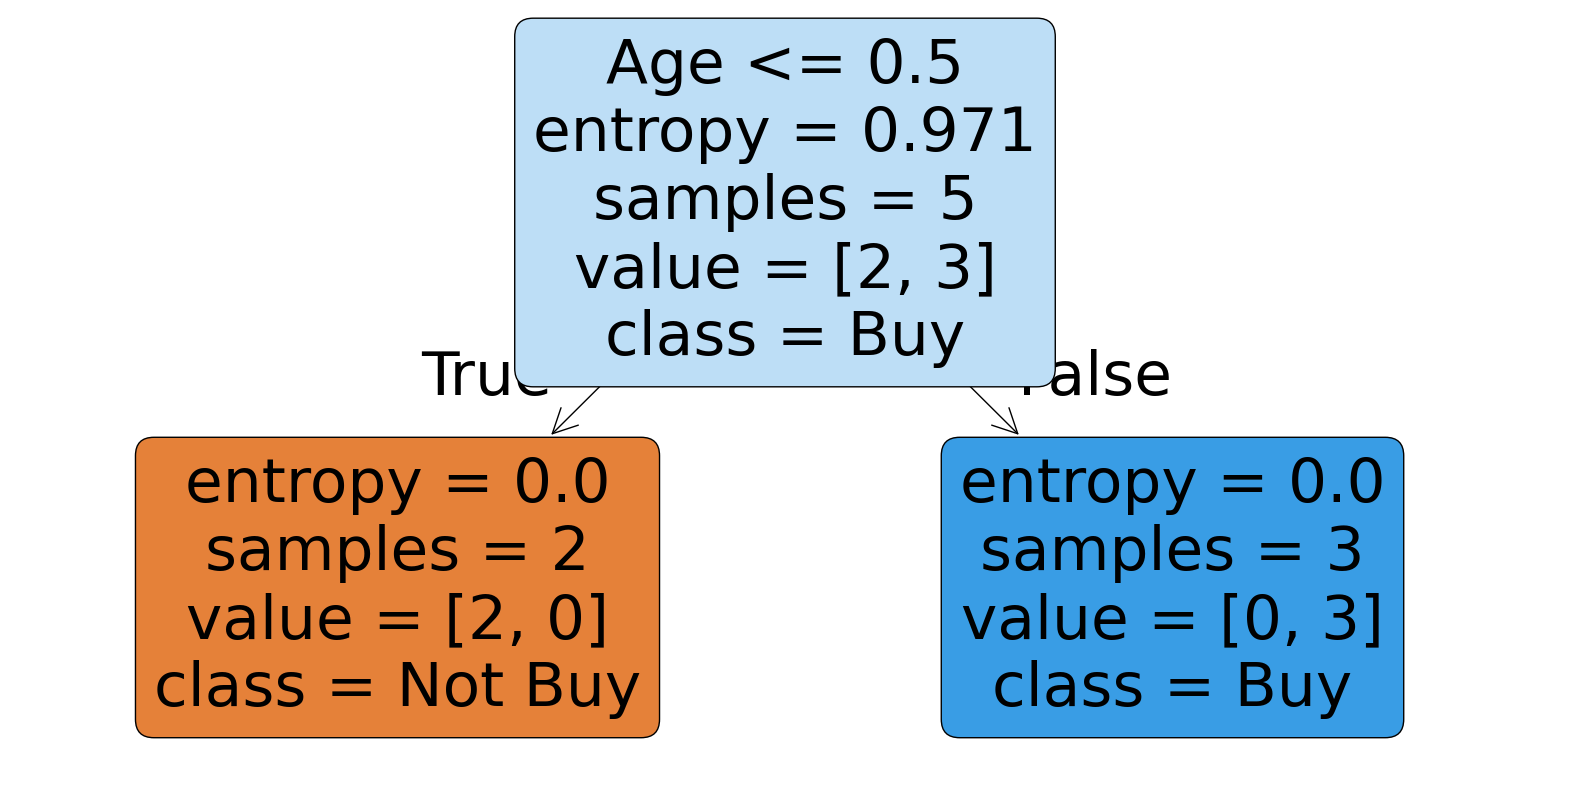


Decision Tree Structure:
|--- Age <= 0.50
|   |--- class: 0
|--- Age >  0.50
|   |--- class: 1


Feature Importances:
Age: 1.0000
Income: 0.0000
Student: 0.0000
Credit Rating: 0.0000
Previous Purchases: 0.0000


In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

X = np.array([
    [0, 2, 0, 0, 0],
    [0, 2, 0, 1, 0],
    [1, 2, 0, 0, 1],
    [2, 1, 0, 0, 0],
    [2, 0, 1, 0, 0]
])

y = np.array([0, 0, 1, 1, 1])
new_customer = np.array([[0, 2, 1, 0, 1]])

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X, y)

prediction = dt_clf.predict(new_customer)
print("Predicted Class:", "Buy" if prediction[0] == 1 else "Not Buy")

feature_names = ['Age', 'Income', 'Student', 'Credit Rating', 'Previous Purchases']
class_names = ['Not Buy', 'Buy']

plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()

print("\nDecision Tree Structure:")
print(export_text(dt_clf, feature_names=feature_names))

print("\nFeature Importances:")
for feature, importance in zip(feature_names, dt_clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")